<a href="https://colab.research.google.com/github/erinijapranckeviciene/MLdata/blob/main/Regresija_Eksperimentai_su_isuic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# ikeliu duomenis is Github, taip patogiau
url="https://raw.githubusercontent.com/erinijapranckeviciene/MLdata/main/Kaggle-data-suic.csv"
data = pd.read_csv(url)

In [ ]:
print(data.dtypes)
#print(type(data))

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object


In [ ]:
data['generation'].value_counts()


Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [ ]:
data['country'].value_counts()
data['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [ ]:
data['age'].value_counts()

55-74 years    4642
15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
5-14 years     4610
Name: age, dtype: int64

Prieš pradedant darbą visada reikia patikrinti su kokiais duomenimis dirbam ar viskas gerai, 

In [ ]:
data.describe(include=['int','int64','float','object'])

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
count,27820,27820.000000,27820,27820,27820.000000,2.782000e+04,27820.000000,27820,8364.000000,27820,27820.000000,27820
unique,101,NaN,2,6,NaN,NaN,NaN,2321,NaN,2321,NaN,6
top,Iceland,NaN,female,75+ years,NaN,NaN,NaN,Antigua and Barbuda1994,NaN,"190,785,204,764",NaN,Generation X
freq,382,NaN,13910,4642,NaN,NaN,NaN,12,NaN,12,NaN,6408
mean,NaN,2001.258375,NaN,NaN,242.574407,1.844794e+06,12.816097,NaN,0.776601,NaN,16866.464414,NaN
std,NaN,8.469055,NaN,NaN,902.047917,3.911779e+06,18.961511,NaN,0.093367,NaN,18887.576472,NaN
min,NaN,1985.000000,NaN,NaN,0.000000,2.780000e+02,0.000000,NaN,0.483000,NaN,251.000000,NaN
25%,NaN,1995.000000,NaN,NaN,3.000000,9.749850e+04,0.920000,NaN,0.713000,NaN,3447.000000,NaN
50%,NaN,2002.000000,NaN,NaN,25.000000,4.301500e+05,5.990000,NaN,0.779000,NaN,9372.000000,NaN
75%,NaN,2008.000000,NaN,NaN,131.000000,1.486143e+06,16.620000,NaN,0.855000,NaN,24874.000000,NaN


country-year yra kategorinis kintamasisi kuris trukdys
taip pat country, šiuos kintamuosius iškeliam į kitus ir pašalinam iš duomenų matricos

In [ ]:
print(data.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


In [ ]:
data.columns=['country','year', 'sex', 'age', 'suicides_no', 'population','suicides_per_100k','country_year','HDI_for_year','ggdp_for_year','gdp_per_capita','generation']
print(data.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_per_100k', 'country_year', 'HDI_for_year', 'ggdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')


blogus kintamuosius pasalinam

In [ ]:
data_new=data.drop(['country','country_year','ggdp_for_year','HDI_for_year'], axis=1)
country=data.country
#print(country)

Pabandyti seaborn įvairiais atvaizdavimo būdais
https://seaborn.pydata.org/examples/horizontal_boxplot.html 

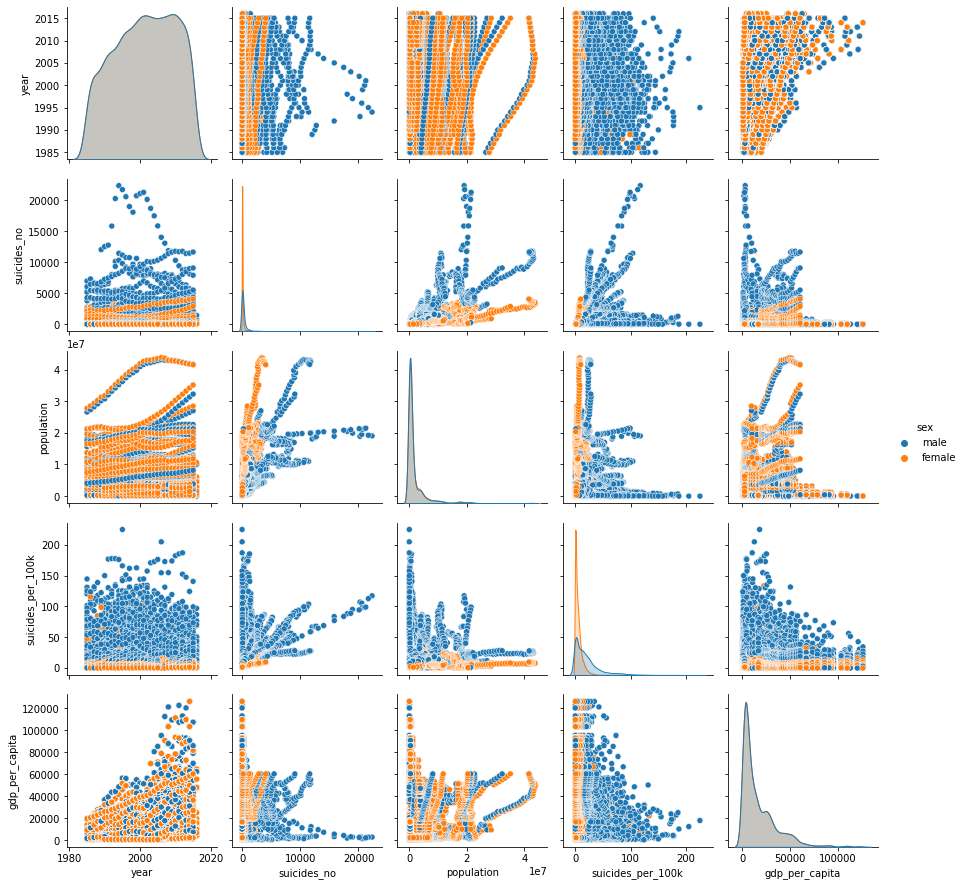

In [ ]:
import seaborn as sns
sns.pairplot(data_new, hue="sex" )

Kategorinius kintamuosius sex, age, generation, reikia perkoduoti taip, kad jie tiktų klasifikavimui ir regresijai. Panaudojam "one hot encoding" . 

In [ ]:
data_dummies=pd.get_dummies(data_new)
list(data_dummies.columns)

['year',
 'suicides_no',
 'population',
 'suicides_per_100k',
 'gdp_per_capita',
 'sex_female',
 'sex_male',
 'age_15-24 years',
 'age_25-34 years',
 'age_35-54 years',
 'age_5-14 years',
 'age_55-74 years',
 'age_75+ years',
 'generation_Boomers',
 'generation_G.I. Generation',
 'generation_Generation X',
 'generation_Generation Z',
 'generation_Millenials',
 'generation_Silent']

prijungiam atgal Country

In [ ]:
data_ready=pd.concat([country,data_dummies], axis=1)
data_ready.head()

,country,year,suicides_no,population,suicides_per_100k,gdp_per_capita,sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,Albania,1987,21,312900,6.71,796,0,1,1,0,0,0,0,0,0,0,1,0,0,0
1,Albania,1987,16,308000,5.19,796,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,Albania,1987,14,289700,4.83,796,1,0,1,0,0,0,0,0,0,0,1,0,0,0
3,Albania,1987,1,21800,4.59,796,0,1,0,0,0,0,0,1,0,1,0,0,0,0
4,Albania,1987,9,274300,3.28,796,0,1,0,1,0,0,0,0,1,0,0,0,0,0


Pasižiūrim reikšmių pasiskirstymus

In [ ]:
data_ready.describe()

,year,suicides_no,population,suicides_per_100k,gdp_per_capita,sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414,0.500000,0.500000,0.166858,0.166858,0.166858,0.165708,0.166858,0.166858,0.179367,0.098634,0.230338,0.052840,0.210065,0.228756
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472,0.500009,0.500009,0.372856,0.372856,0.372856,0.371825,0.372856,0.372856,0.383667,0.298175,0.421057,0.223717,0.407362,0.420040
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Kokius klausimus galėtume paklausti turėdami šiuos duomenis? Kas mūsų "Target"? Pasirinkime suicides ir ištirkime kokie faktoriai geriausiai prognozuoja šį dydį 

In [ ]:
y=data_ready.suicides_no
X=data_ready.drop(['country','suicides_no','suicides_per_100k'],axis=1)
X.head()

,year,population,gdp_per_capita,sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1987,312900,796,0,1,1,0,0,0,0,0,0,0,1,0,0,0
1,1987,308000,796,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,1987,289700,796,1,0,1,0,0,0,0,0,0,0,1,0,0,0
3,1987,21800,796,0,1,0,0,0,0,0,1,0,1,0,0,0,0
4,1987,274300,796,0,1,0,1,0,0,0,0,1,0,0,0,0,0


Turime pasiruošti duomenis mokymui ir testavimui

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Regresijos modelių tyrimas

In [ ]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
r2_score?

Sukuriam regresijos modelius

In [ ]:
from time import time

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

regressors = [
    LinearRegression(), 
    RANSACRegressor(), 
    KNeighborsRegressor(),
    KNeighborsRegressor(n_neighbors=9, metric='manhattan'),
    SVR(),
    LinearSVR(),
    GaussianProcessRegressor(),
    SVR(kernel='linear'), # Cf. LinearSVR: much slower, might be better or worse: 
]

Bandom regresijos modelius

In [ ]:
head = 6
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    predictions = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, predictions))
    print("\tMean absolute error:", mean_absolute_error(y_test, predictions))
    print("\tR2 score:", r2_score(y_test, predictions))
    print()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
	Training time: 0.047s
	Prediction time: 0.002s
	Explained variance: 0.4245191072426845
	Mean absolute error: 265.6400741449136
	R2 score: 0.42446036345651617

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)
	Training time: 0.228s
	Prediction time: 0.002s
	Explained variance: 0.2894687486643983
	Mean absolute error: 221.89076402470474
	R2 score: 0.2830257172133084

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
	Training time: 0.083s
	Prediction time: 0.080s
	Explained variance: 0.3280914333378333
	Mean absolute error: 221.25

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Regresijos modeliai, kurie "užnulina" nereikšmingų požymių koeficientus

In [ ]:
from sklearn.linear_model import Lasso, Ridge

lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()

for model in [lr, lasso, ridge]:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(model)
    print(model.coef_)
    print("\tExplained variance:", explained_variance_score(y_test, predictions))
    print("\tMean absolute error:", mean_absolute_error(y_test, predictions))
    print("\tR2 score:", r2_score(y_test, predictions))
    print()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[-2.05761236e+00  1.42709360e-04  6.60299999e-04 -1.34036370e+02
  1.34036370e+02 -6.57114687e+01  1.02309269e+01  9.86239986e+01
 -2.44755076e+02  1.10393980e+02  9.12176399e+01  1.39335682e+01
 -1.86342472e+01 -2.29374443e+01  3.95095009e+01  4.27191435e+00
 -1.61432919e+01]
	Explained variance: 0.4245191072426845
	Mean absolute error: 265.6400741449136
	R2 score: 0.42446036345651617

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
[-1.38538105e+00  1.42712268e-04  6.58799873e-04 -2.64090128e+02
  0.00000000e+00 -6.87700176e+01 -0.00000000e+00  6.51045515e+01
 -2.41113817e+02  5.76912996e+01  3.34569783e+01  6.07236451e+00
  0.00000000e+00 -4.19170679e+01 -0.00000000e+00 -2.66996465e+01
  0.00000000e+00]
	Explained variance: 0.4243632108344272
	Mean absolute 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.15218e-18): result may not be accurate.
  overwrite_a=True).T


Pabandykim vizualizuoti 

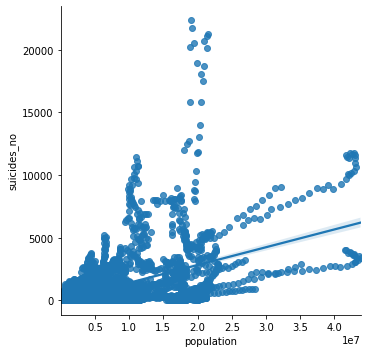

In [ ]:
import seaborn as sns
viz=pd.concat([data_ready.suicides_no,data_ready.year, data_ready.population], axis=1)
sns.lmplot(x="population", y="suicides_no", data=viz, palette="muted");